In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
profile_df = pd.read_csv('./data/user_profile.csv')
profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [3]:
features = list(profile_df.columns[1:])
features

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [4]:
scaler = StandardScaler()
profile_df[features] = scaler.fit_transform(profile_df[features])


In [5]:
profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04,3.392100e+04
mean,1.064677e+06,3.016366e-17,1.256819e-17,-9.216674e-18,-5.278641e-17,2.765002e-17,-4.775913e-17,2.094699e-18,2.848790e-17,-2.681214e-17,-4.021821e-17,-1.244251e-16,-4.189397e-19,3.979927e-18,5.781368e-17
std,4.977506e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.247949e-01,-8.261812e-01,-6.007665e-01,-7.612265e-01,-4.254563e-01,-6.589982e-01,-2.428895e-02,-9.722098e-01,-6.580802e-01,-4.386330e-01,-4.343491e-01,-5.267611e-01,-2.317752e-01,-5.057422e-01
25%,6.814630e+05,-7.247949e-01,-8.261812e-01,-6.007665e-01,-7.612265e-01,-4.254563e-01,-6.589982e-01,-2.428895e-02,-9.722098e-01,-6.580802e-01,-4.386330e-01,-4.343491e-01,-5.267611e-01,-2.317752e-01,-5.057422e-01
50%,1.044083e+06,-3.306006e-01,-1.164027e-01,-6.007665e-01,-1.308839e-01,-4.254563e-01,-6.589982e-01,-2.428895e-02,-3.986205e-01,-3.808721e-01,-4.386330e-01,-4.343491e-01,-5.267611e-01,-2.317752e-01,-5.057422e-01
75%,1.452215e+06,4.577881e-01,5.933757e-01,1.803221e-01,4.994587e-01,-4.254563e-01,-1.007535e-02,-2.428895e-02,7.485583e-01,1.735442e-01,-4.386330e-01,-4.343491e-01,1.693507e-01,-2.317752e-01,5.198313e-01
max,2.103117e+06,7.553286e+00,3.432490e+00,9.293022e+00,9.324255e+00,5.947745e+00,7.776998e+00,4.117098e+01,5.146077e+00,6.826539e+00,5.249008e+00,7.250495e+00,1.200325e+01,1.076820e+01,5.647699e+00


In [6]:
features = profile_df.loc[:,profile_df.columns!='user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.107907,2.486118,0.961411,8.273684,0.849184,6.479153,-0.024289,4.572487,5.024686,1.457247,7.250495,7.362506,6.368209,2.570978
1,4.531130,-0.352996,0.440685,5.121971,-0.425456,2.369308,-0.024289,2.851719,2.668417,-0.438633,2.127266,0.865463,-0.231775,0.519831
2,2.428760,1.066561,4.085765,4.281514,-0.425456,5.830230,-0.024289,3.234112,1.282377,1.457247,5.542752,5.506208,2.701551,2.570978
3,-0.461999,-0.826181,-0.600767,-0.340998,-0.425456,-0.658998,-0.024289,-0.972210,-0.380872,-0.438633,-0.434349,-0.526761,-0.231775,-0.505742
4,0.063594,-0.826181,-0.600767,0.079230,-0.425456,-0.658998,-0.024289,-0.972210,0.173544,-0.438633,0.419523,-0.526761,-0.231775,-0.505742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33916,-0.724795,-0.826181,0.180322,-0.761227,2.123824,-0.658998,-0.024289,-0.972210,-0.658080,-0.438633,-0.434349,0.169351,-0.231775,-0.505742
33917,-0.724795,-0.826181,0.180322,-0.761227,2.123824,-0.658998,-0.024289,-0.972210,-0.658080,-0.438633,-0.434349,0.169351,-0.231775,-0.505742
33918,-0.330601,-0.116403,0.180322,-0.130884,0.849184,-0.010075,-0.024289,0.174969,-0.242268,-0.438633,2.127266,0.865463,1.968219,-0.505742
33919,-0.330601,-0.826181,0.961411,-0.130884,-0.425456,-0.010075,-0.024289,-0.972210,-0.658080,-0.438633,-0.434349,-0.526761,-0.231775,-0.505742


In [7]:
user_ids = profile_df.loc[:,profile_df.columns=='user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33916,2103113
33917,2103114
33918,2103115
33919,2103116


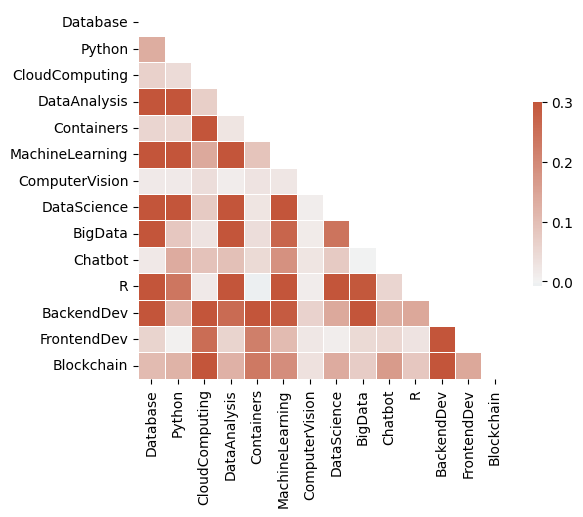

In [8]:
corr = features.cov()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [9]:
r = []
for n in range(1,15):
    pca = PCA(n_components=n)
    pca.fit(features)
    r.append(sum(pca.explained_variance_ratio_))
r

[0.2875477223566014,
 0.4630615677840293,
 0.5760766221965163,
 0.6486959230796562,
 0.7194419229442153,
 0.7881775406165039,
 0.8429211782015421,
 0.8944220070907904,
 0.9272409862204334,
 0.9544333483018855,
 0.9733527621258774,
 0.9870305500245972,
 0.9979157692375631,
 0.9999999999999999]

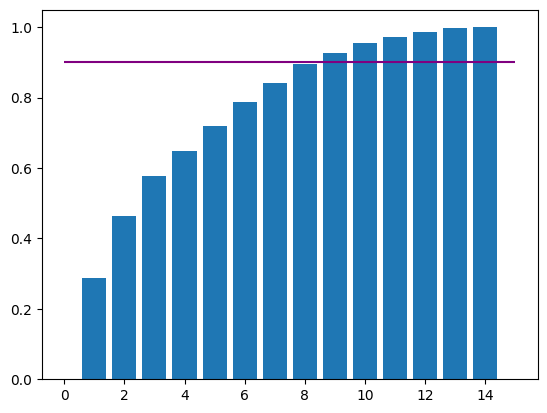

In [10]:
plt.bar(x=list(range(1,15)),height=r)
plt.hlines(y=0.9,xmax=15.0,xmin=0.0,colors='purple')
plt.show()

In [11]:
n = 14
pca = PCA(n_components=n)
features_red = pca.fit_transform(features)
rename_pc = ['pca'+str(i) for i in range(1,n+1)]
merged_pca_df = user_ids.join(pd.DataFrame(features_red, columns=rename_pc)).reset_index(drop=True)
merged_pca_df

,user,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
0,2,17.776366,0.215244,1.730169,2.565014,-3.824451,2.704199,0.666502,2.316522,0.870132,-1.067073,0.210700,1.421812,0.513198,0.438697
1,4,7.149322,-2.841896,2.359838,-0.578677,0.399193,-0.134323,0.546961,0.471329,0.033747,0.438824,1.485890,1.995227,0.256580,1.297385
2,5,11.365557,1.883400,-1.523585,1.073609,-1.709459,0.881750,1.661628,2.944378,2.097815,0.227644,2.635147,-0.259926,1.577167,0.363232
3,7,-1.833435,-0.279591,0.564860,0.054184,-0.065086,0.165429,0.031395,0.039196,0.210801,-0.315299,0.087576,0.304970,0.083064,0.013275
4,8,-1.048141,-0.686035,1.073002,0.006577,-0.006246,0.119040,0.116370,0.559720,0.186277,-0.680146,0.070821,0.186647,-0.037134,-0.013786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33916,2103113,-1.461081,1.684683,0.211935,-1.010829,0.646346,0.151528,-0.778832,0.452050,0.241943,-0.317263,-1.030211,0.568637,0.166411,0.007030
33917,2103114,-1.461081,1.684683,0.211935,-1.010829,0.646346,0.151528,-0.778832,0.452050,0.241943,-0.317263,-1.030211,0.568637,0.166411,0.007030
33918,2103115,0.948134,1.006128,-0.045071,-0.022152,-0.916376,1.808640,-0.182640,1.931113,-0.126684,-0.547435,-0.523821,-0.292254,-0.315367,-0.133065
33919,2103116,-1.285569,0.370554,0.180321,-0.393487,0.271165,0.066129,-0.161375,0.148097,0.692202,-0.165065,1.250351,0.051380,-0.006187,0.292644


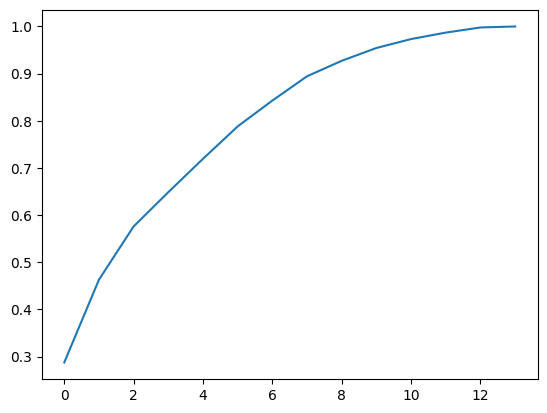

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

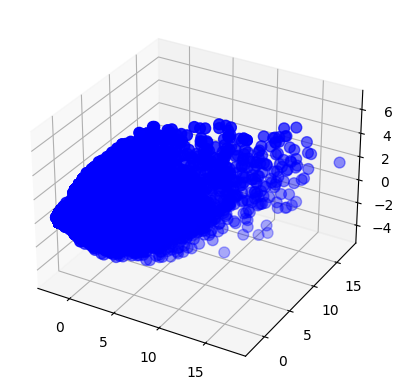

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(merged_pca_df['pca1'], merged_pca_df['pca1'], merged_pca_df['pca3'], c='blue', s=60)

In [14]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(merged_pca_df)

array([5, 5, 5, ..., 6, 6, 6])

In [15]:
clustered_users = user_ids.join(pd.DataFrame(model.labels_, columns=['cluster']))
clustered_users

,user,cluster
0,2,5
1,4,5
2,5,5
3,7,5
4,8,5
...,...,...
33916,2103113,6
33917,2103114,6
33918,2103115,6
33919,2103116,6


In [16]:
ratings_df = pd.read_csv('./data/ratings.csv')[['user','item']]
ratings_df.head()

,user,item
0,1889878,CC0101EN
1,1342067,CL0101EN
2,1990814,ML0120ENv3
3,380098,BD0211EN
4,779563,DS0101EN


In [17]:
labelled = pd.merge(clustered_users, ratings_df, left_on='user', right_on='user')

labelled

,user,cluster,item
0,2,5,LB0105ENv1
1,2,5,ST0101EN
2,2,5,PY0101EN
3,2,5,ML0120ENv2
4,2,5,DA0101EN
...,...,...,...
233389,2103116,6,CC0120EN
233390,2103116,6,QC0101EN
233391,2103117,6,ML0201EN
233392,2103117,6,ML0122EN


In [18]:
labelled.to_csv("./data/user_profile_clustered_pca.csv", index=False)

In [19]:
courses_clusters = labelled[['item','cluster']]
courses_clusters['count'] = [1] * len(courses_clusters)
courses_clusters = courses_clusters.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()
courses_clusters

,cluster,item,enrollments
0,0,AI0111EN,6
1,0,BC0101EN,561
2,0,BC0201EN,224
3,0,BC0202EN,21
4,0,BD0101EN,868
...,...,...,...
1952,19,SECM03EN,40
1953,19,ST0101EN,253
1954,19,SW0101EN,47
1955,19,SW0201EN,25


In [20]:
clustered_users.tail()

,user,cluster
33916,2103113,6
33917,2103114,6
33918,2103115,6
33919,2103116,6
33920,2103117,6


In [21]:
clustered_users[clustered_users['user']==2103111]

,user,cluster
33914,2103111,6


In [22]:
courses_clusters[courses_clusters['item'] == 'SW0101EN'].sort_values(by='enrollments',ascending=False)

,cluster,item,enrollments
1085,10,SW0101EN,68
1954,19,SW0101EN,47
880,8,SW0101EN,34
1475,14,SW0101EN,29
1865,18,SW0101EN,29
786,7,SW0101EN,22
482,4,SW0101EN,21
1774,17,SW0101EN,19
185,1,SW0101EN,19
1676,16,SW0101EN,10


In [23]:
ratings_df

,user,item
0,1889878,CC0101EN
1,1342067,CL0101EN
2,1990814,ML0120ENv3
3,380098,BD0211EN
4,779563,DS0101EN
...,...,...
233706,2103116,CC0120EN
233707,2103116,QC0101EN
233708,2103117,ML0201EN
233709,2103117,ML0122EN


In [24]:

def generate_recommendations(user_id):
    courses_clusters = labelled[['item','cluster']]
    courses_clusters['count'] = [1] * len(courses_clusters)
    courses_clusters = courses_clusters.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()

    recommend = {}
    union_courses=set()
    d_user = labelled[labelled['user']==user_id]
    cluster = d_user['cluster'].iloc[0]
    all_courses_cluster = courses_clusters[courses_clusters['cluster']==cluster]
    all_courses_cluster = all_courses_cluster.sort_values(by='enrollments').iloc[:10,1].values
    user_courses = d_user['item'].values
    new_courses = list(set(all_courses_cluster).difference(set(all_courses_cluster).intersection(user_courses)))
    recommend[user_id] = new_courses
    union_courses = union_courses.union(set(new_courses))
    return union_courses,recommend

In [32]:
d_user = labelled[labelled['user']==user_id]
cluster = d_user['cluster'].values[0]
cluster

5

In [25]:
labelled[labelled['item']=='LB0101ENv1']

,user,cluster,item
23,2,5,LB0101ENv1
187,12,5,LB0101ENv1
619,7764,5,LB0101ENv1
768,16164,5,LB0101ENv1
910,23877,5,LB0101ENv1
...,...,...,...
230874,2045858,6,LB0101ENv1
230905,2046241,6,LB0101ENv1
230948,2046749,6,LB0101ENv1
231458,2057016,6,LB0101ENv1


In [26]:
user_id = 23877					
d_user = labelled[labelled['user'] == user_id]
d_user.loc[:,['item']].values

array([['LB0109ENv1'],
       ['LB0105ENv1'],
       ['LB0103ENv1'],
       ['LB0101ENv1'],
       ['LB0111EN'],
       ['LB0107ENv1']], dtype=object)

In [27]:
union_courses,recommend = generate_recommendations(user_id)
avail = list(union_courses)
user_recommendations = pd.DataFrame([[user]+[courses.count(c) for c in avail] for user,courses in recommend.items()],columns=['user']+avail)

In [28]:
ll = list(user_recommendations.columns[1:])
recom = {len(ll) - i: ll[i] for i in range(len(ll))}
recom

{10: 'DX0108EN',
 9: 'TMP107',
 8: 'GPXX0T0FEN',
 7: 'SW0101EN',
 6: 'ST0201EN',
 5: 'DX0107EN',
 4: 'ST0301EN',
 3: 'HCC105EN',
 2: 'DX0106EN',
 1: 'RAVSCTEST1'}

In [ ]:
# def content_clustering_pca(n,user_id):
#     profile_df = pd.read_csv('./data/user_profile.csv')
#     ratings_df = pd.read_csv('./data/ratings.csv')[['user','item']]

#     feature_names = list(profile_df.columns[1:])

#     #standardize and training
#     scaler = StandardScaler()
#     profile_df[features] = scaler.fit_transform(profile_df[feature_names])

#     features = profile_df.loc[:,profile_df.columns!='user']
#     user_ids = profile_df.loc[:,profile_df.columns=='user']

#     pca = PCA(n_components=n)
#     features_red = pca.fit_transform(features)
#     rename_pc = ['pca'+str(i) for i in range(1,n+1)]
#     merged_pca_df = user_ids.join(pd.DataFrame(features_red, columns=rename_pc)).reset_index(drop=True)
    
#     model = KMeans(n_init='auto',n_clusters=20)
#     model.fit_predict(merged_pca_df)
    
#     clustered_users = user_ids.join(pd.DataFrame(model.labels_, columns=['cluster']))
#     labelled = pd.merge(clustered_users, ratings_df, left_on='user', right_on='user')
    
    
#     # in predict function
#     courses_clusters = labelled[['item','cluster']]
#     courses_clusters['count'] = [1] * len(courses_clusters)
#     courses_clusters = courses_clusters.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()


#     #recommendation
#     recommend = {}
#     union_courses=set()
#     d_user = labelled[labelled['user']==user_id]
#     cluster = d_user['cluster'].iloc[0]
#     all_courses_cluster = courses_clusters[courses_clusters['cluster']==cluster]
#     all_courses_cluster = all_courses_cluster.sort_values(by='enrollments').iloc[:10,1].values
#     user_courses = d_user['item'].values
#     new_courses = list(set(all_courses_cluster).difference(set(all_courses_cluster).intersection(user_courses)))
#     recommend[user_id] = new_courses
#     union_courses = union_courses.union(set(new_courses))
#     return union_courses,recommend

